In [115]:
import pandas as pd
df = pd.read_csv("Redwine.csv",sep=';')

In [116]:

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [117]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [118]:
x = df.iloc[:,0:11]
y = df['quality']
y1= to_categorical(y)

In [119]:
from sklearn.preprocessing import MinMaxScaler as mm
mm = mm()
x = mm.fit_transform(x)

In [120]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y1,shuffle=True,random_state=1,train_size=0.80)

In [121]:
model = Sequential()
model.add(Dense(100,input_dim=11,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [122]:
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [123]:
history=model.fit(xtrain,ytrain,epochs=25)

Epoch 1/25
40/40 [==============================] - 0s 677us/step - loss: 1.5150 - accuracy: 0.4410
Epoch 2/25
40/40 [==============================] - 0s 626us/step - loss: 1.1767 - accuracy: 0.5246
Epoch 3/25
40/40 [==============================] - 0s 651us/step - loss: 1.1294 - accuracy: 0.5403
Epoch 4/25
40/40 [==============================] - 0s 629us/step - loss: 1.0794 - accuracy: 0.5520
Epoch 5/25
40/40 [==============================] - 0s 648us/step - loss: 1.0444 - accuracy: 0.5637
Epoch 6/25
40/40 [==============================] - 0s 642us/step - loss: 1.0228 - accuracy: 0.5668
Epoch 7/25
40/40 [==============================] - 0s 628us/step - loss: 1.0087 - accuracy: 0.5770
Epoch 8/25
40/40 [==============================] - 0s 647us/step - loss: 0.9909 - accuracy: 0.5817
Epoch 9/25
40/40 [==============================] - 0s 660us/step - loss: 0.9857 - accuracy: 0.5754
Epoch 10/25
40/40 [==============================] - 0s 621us/step - loss: 0.9789 - accuracy: 0.5801

In [124]:
model.evaluate(xtrain,ytrain)

40/40 [==============================] - 0s 581us/step - loss: 0.9142 - accuracy: 0.6122


[0.9141653776168823, 0.6121970415115356]

In [125]:
t = [1 if i > 0.5 else 0 for i in model.predict(xtest)[0] ]
# model.predict(xtest).shape

10/10 [==============================] - 0s 652us/step


In [126]:
loss_val=history.history['loss']

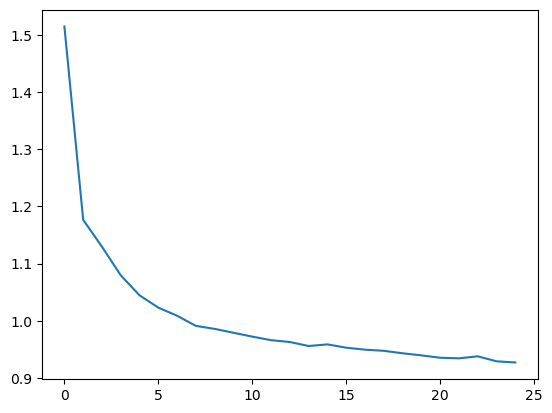

In [127]:
import matplotlib.pyplot as plt
plt.plot(range(0,25),loss_val)

In [ ]:
# Adding this new line

In [ ]:
#new
